In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf


In [4]:
df = pd.read_csv(r'\DATA\kc_house_data.csv')

In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


C:\Users\Ankita Jadhav\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

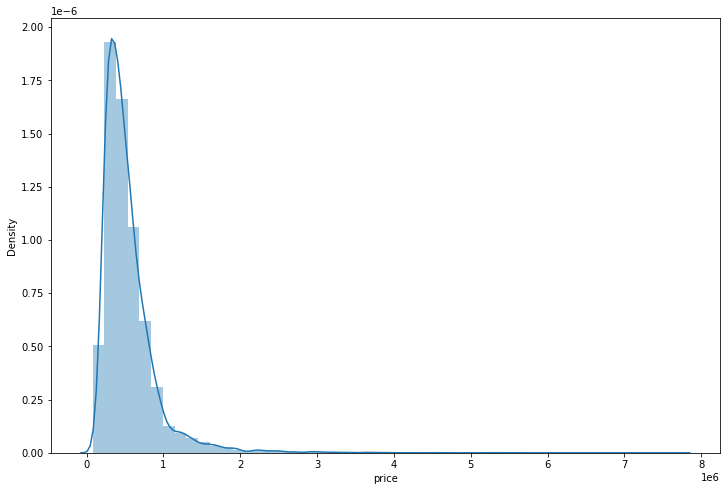

In [8]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

C:\Users\Ankita Jadhav\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

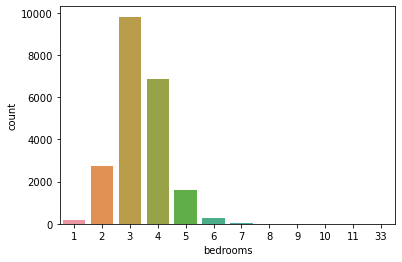

In [9]:
#plt.figure(figsize=(12,8))
sns.countplot(df['bedrooms'])

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

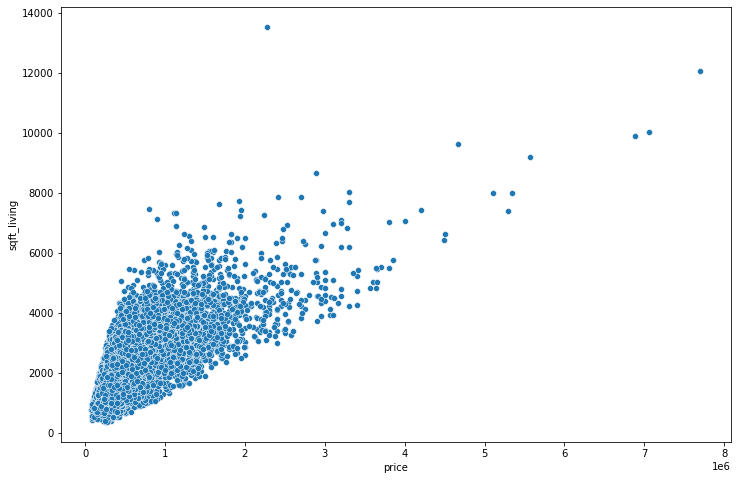

In [10]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data = df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

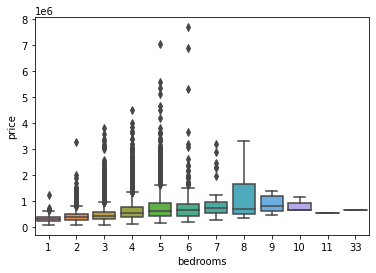

In [11]:
sns.boxplot(x='bedrooms',y='price',data = df)

<AxesSubplot:xlabel='price', ylabel='long'>

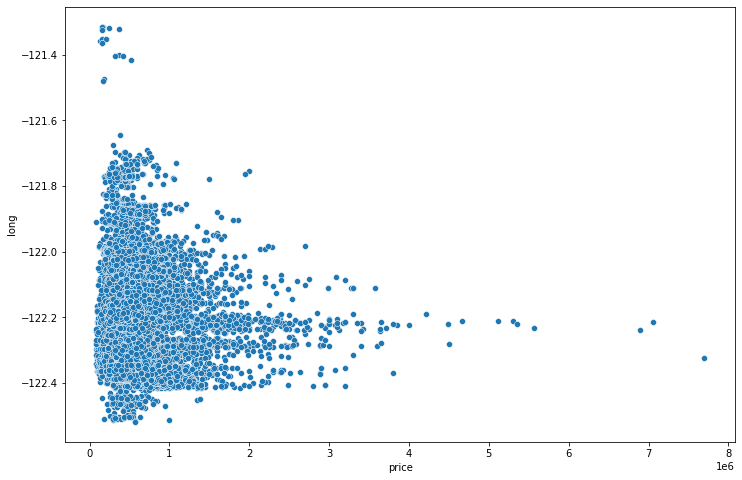

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

<AxesSubplot:xlabel='price', ylabel='lat'>

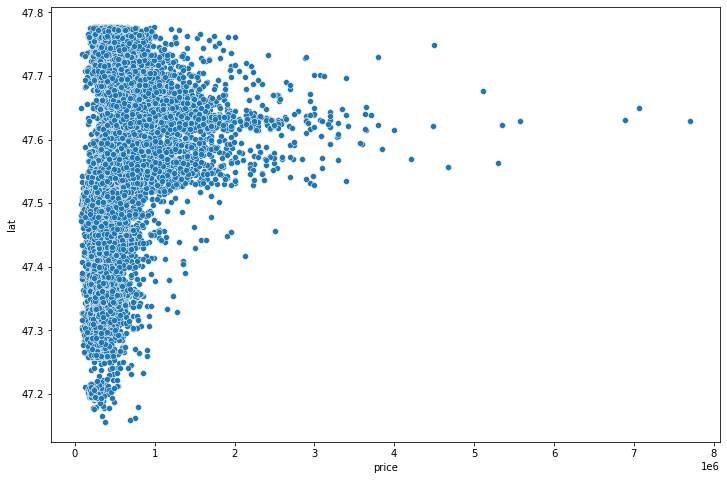

In [13]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data = df)

<AxesSubplot:xlabel='long', ylabel='lat'>

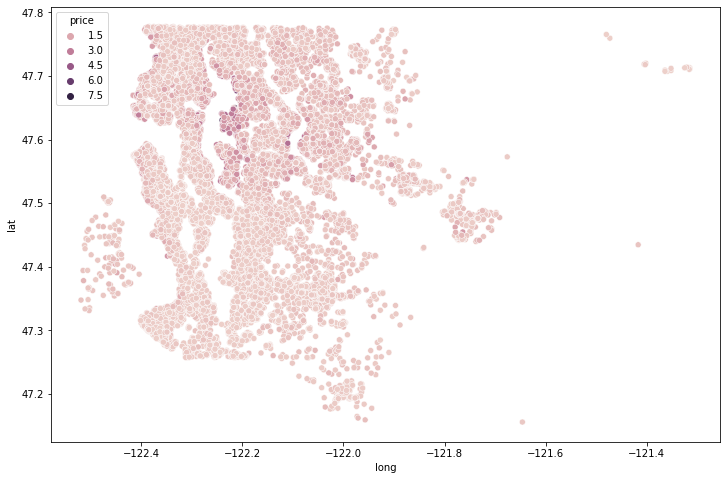

In [14]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [15]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [16]:
len(df)*0.01

215.97

In [17]:
None_top_val = df.sort_values('price',ascending=False).iloc[216:]

<AxesSubplot:xlabel='long', ylabel='lat'>

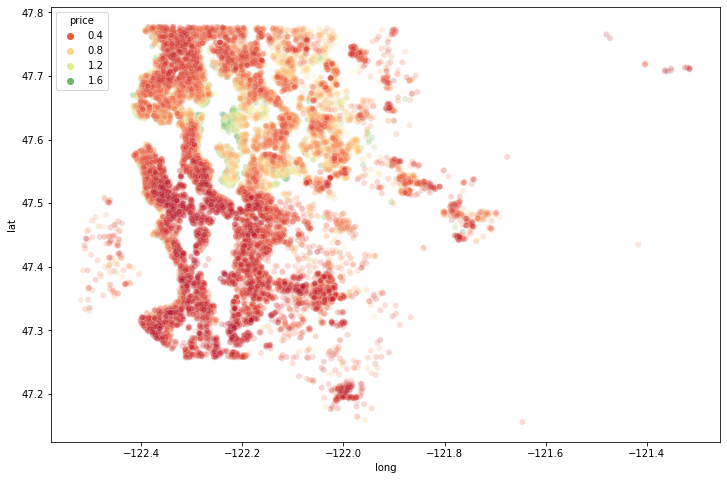

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=None_top_val,hue='price',alpha=0.2,palette='RdYlGn')

Feature Engineering

In [19]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [20]:
df= df.drop('id',axis=1)

In [21]:
df['date'].head()

0    10/13/2014
1     12/9/2014
2     2/25/2015
3     12/9/2014
4     2/18/2015
Name: date, dtype: object

In [22]:
df['date'] = pd.to_datetime(df['date'])

In [23]:
df['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [24]:
df['month'] = df['date'].apply(lambda date: date.month)

# lambda is used to reduce the function declaration into one line
# def datetomonth (date):
#     return date.month

In [25]:
df['year'] = df['date'].apply(lambda date:date.year)

In [26]:
df['year'].value_counts()

2014    14622
2015     6975
Name: year, dtype: int64

<AxesSubplot:xlabel='year', ylabel='price'>

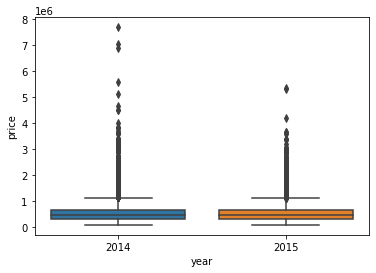

In [27]:
sns.boxplot(x='year',y='price',data=df)

<AxesSubplot:xlabel='month', ylabel='price'>

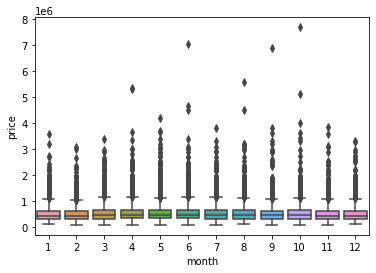

In [28]:
sns.boxplot(x='month',y='price',data =df)

<AxesSubplot:xlabel='month'>

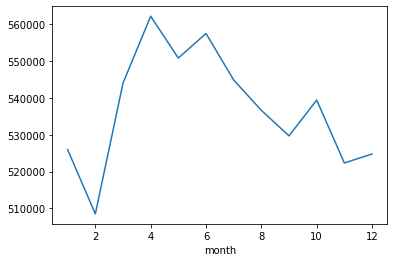

In [29]:
df.groupby('month').mean()['price'].plot()

In [30]:
df = df.drop('date',axis=1)

In [31]:
df['waterfront'].value_counts()

0    21434
1      163
Name: waterfront, dtype: int64

In [32]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [33]:
df['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [34]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [35]:
df = df.drop('zipcode',axis=1)

Splitting the data into train and test set

In [67]:
X = df.drop('price',axis = 1).values
y = df['price'].values

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
scaler = MinMaxScaler()

In [90]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [91]:
X_train.shape

(15117, 19)

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation
from tensorflow.keras.optimizers import Adam

In [93]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam' , loss='mse')

In [94]:
model.fit(x=X_train , y =y_train,
         validation_data=(X_test,y_test),
         batch_size = 256 , epochs = 400)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 1s 86us/sample - loss: 430250224102.4965 - val_loss: 418982135782.7161
Epoch 2/400
15117/15117 [==============================] - 0s 17us/sample - loss: 430206123149.7762 - val_loss: 418863435684.9778
Epoch 3/400
15117/15117 [==============================] - 0s 16us/sample - loss: 429787151747.8018 - val_loss: 417949075552.0790
Epoch 4/400
15117/15117 [==============================] - 0s 17us/sample - loss: 427342378113.4479 - val_loss: 413415283502.1432
Epoch 5/400
15117/15117 [==============================] - 0s 16us/sample - loss: 417862579610.1555 - val_loss: 398540591741.1556
Epoch 6/400
15117/15117 [==============================] - 0s 13us/sample - loss: 391822466680.2017 - val_loss: 362323246861.2740
Epoch 7/400
15117/15117 [==============================] - 0s 15us/sample - loss: 337812198222.1869 - val_loss: 295751482097.4617
Epoch 8/400
15117/15117 [================

15117/15117 [==============================] - 0s 9us/sample - loss: 46773290381.6916 - val_loss: 52487446543.1704
Epoch 65/400
15117/15117 [==============================] - 0s 8us/sample - loss: 46428288838.2616 - val_loss: 51839417346.5284
Epoch 66/400
15117/15117 [==============================] - 0s 10us/sample - loss: 46131936798.8548 - val_loss: 52366490631.5852
Epoch 67/400
15117/15117 [==============================] - 0s 10us/sample - loss: 45772615656.4271 - val_loss: 50588492165.3728
Epoch 68/400
15117/15117 [==============================] - 0s 10us/sample - loss: 45494741067.4605 - val_loss: 50689951759.1704
Epoch 69/400
15117/15117 [==============================] - 0s 10us/sample - loss: 45150829593.2664 - val_loss: 50526582313.7185
Epoch 70/400
15117/15117 [==============================] - 0s 10us/sample - loss: 44848201072.2932 - val_loss: 50026094005.4123
Epoch 71/400
15117/15117 [==============================] - 0s 11us/sample - loss: 44542621916.6914 - val_loss: 

15117/15117 [==============================] - 0s 13us/sample - loss: 35661724904.2747 - val_loss: 39967036939.3778
Epoch 128/400
15117/15117 [==============================] - 0s 14us/sample - loss: 35589950688.2815 - val_loss: 40499867086.6963
Epoch 129/400
15117/15117 [==============================] - 0s 14us/sample - loss: 35553904651.3800 - val_loss: 39772269105.3037
Epoch 130/400
15117/15117 [==============================] - 0s 13us/sample - loss: 35475204313.1690 - val_loss: 39579473854.2617
Epoch 131/400
15117/15117 [==============================] - 0s 15us/sample - loss: 35395498804.6496 - val_loss: 39222010250.4296
Epoch 132/400
15117/15117 [==============================] - 0s 14us/sample - loss: 35342067910.6087 - val_loss: 39115715591.5852
Epoch 133/400
15117/15117 [==============================] - 0s 14us/sample - loss: 35263237799.8894 - val_loss: 38712647958.1235
Epoch 134/400
15117/15117 [==============================] - 0s 15us/sample - loss: 35208611666.9964 - v

Epoch 190/400
15117/15117 [==============================] - 0s 15us/sample - loss: 32911172240.4519 - val_loss: 35673376317.9457
Epoch 191/400
15117/15117 [==============================] - 0s 14us/sample - loss: 32903183209.2145 - val_loss: 35086127771.4963
Epoch 192/400
15117/15117 [==============================] - 0s 14us/sample - loss: 32858257655.2448 - val_loss: 35731765344.0790
Epoch 193/400
15117/15117 [==============================] - 0s 12us/sample - loss: 32883756820.5416 - val_loss: 35328195738.2321
Epoch 194/400
15117/15117 [==============================] - 0s 12us/sample - loss: 32828613310.7172 - val_loss: 35359746407.0321
Epoch 195/400
15117/15117 [==============================] - 0s 11us/sample - loss: 32815297618.3020 - val_loss: 35103810238.8938
Epoch 196/400
15117/15117 [==============================] - 0s 12us/sample - loss: 32770951289.0484 - val_loss: 35794177324.8790
Epoch 197/400
15117/15117 [==============================] - 0s 12us/sample - loss: 327444

15117/15117 [==============================] - 0s 10us/sample - loss: 31787653200.1683 - val_loss: 34008163386.1531
Epoch 254/400
15117/15117 [==============================] - 0s 9us/sample - loss: 31763321504.5737 - val_loss: 34151518880.5531
Epoch 255/400
15117/15117 [==============================] - 0s 9us/sample - loss: 31752623868.0204 - val_loss: 34169076399.7235
Epoch 256/400
15117/15117 [==============================] - 0s 9us/sample - loss: 31733787770.6741 - val_loss: 33694464338.8049
Epoch 257/400
15117/15117 [==============================] - 0s 9us/sample - loss: 31728895215.7259 - val_loss: 33814058992.8296
Epoch 258/400
15117/15117 [==============================] - 0s 9us/sample - loss: 31744178341.4847 - val_loss: 34585107134.8938
Epoch 259/400
15117/15117 [==============================] - 0s 9us/sample - loss: 31725520821.6233 - val_loss: 33754327859.2000
Epoch 260/400
15117/15117 [==============================] - 0s 9us/sample - loss: 31757722220.4829 - val_loss

15117/15117 [==============================] - 0s 10us/sample - loss: 31060709543.6184 - val_loss: 33010081620.0691
Epoch 317/400
15117/15117 [==============================] - 0s 13us/sample - loss: 31087590752.5779 - val_loss: 33600698231.4667
Epoch 318/400
15117/15117 [==============================] - 0s 12us/sample - loss: 31100037099.2721 - val_loss: 33819951437.7481
Epoch 319/400
15117/15117 [==============================] - 0s 13us/sample - loss: 31072644442.7524 - val_loss: 32667339449.8370
Epoch 320/400
15117/15117 [==============================] - 0s 13us/sample - loss: 31052369101.8567 - val_loss: 34227486037.3333
Epoch 321/400
15117/15117 [==============================] - 0s 13us/sample - loss: 31016689503.0538 - val_loss: 33163980041.4815
Epoch 322/400
15117/15117 [==============================] - 0s 12us/sample - loss: 30995773200.5112 - val_loss: 34538259428.1877
Epoch 323/400
15117/15117 [==============================] - 0s 13us/sample - loss: 31028507704.3583 - v

15117/15117 [==============================] - 0s 14us/sample - loss: 30612878339.4547 - val_loss: 34810760750.7753
Epoch 380/400
15117/15117 [==============================] - 0s 14us/sample - loss: 30559179004.1220 - val_loss: 33726651136.6321
Epoch 381/400
15117/15117 [==============================] - 0s 14us/sample - loss: 30553345050.7566 - val_loss: 34196607759.8025
Epoch 382/400
15117/15117 [==============================] - 0s 14us/sample - loss: 30523364211.3075 - val_loss: 34018509816.4148
Epoch 383/400
15117/15117 [==============================] - 0s 14us/sample - loss: 30515270565.2984 - val_loss: 34197874187.3778
Epoch 384/400
15117/15117 [==============================] - 0s 14us/sample - loss: 30512575956.8846 - val_loss: 34028324641.5012
Epoch 385/400
15117/15117 [==============================] - 0s 12us/sample - loss: 30489162486.9400 - val_loss: 33580780536.4148
Epoch 386/400
15117/15117 [==============================] - 0s 8us/sample - loss: 30543389343.9640 - va

In [95]:
model.history.history

{'loss': [430250224102.4965,
  430206123149.7763,
  429787151747.8018,
  427342378113.4479,
  417862579610.15546,
  391822466680.2016,
  337812198222.18695,
  253251231487.67825,
  164677722024.75305,
  111924161675.20222,
  99472345543.47238,
  97603844720.41173,
  96635839992.44717,
  95677280304.50063,
  94726646399.5851,
  93767118239.16809,
  92754297596.63002,
  91739883546.41794,
  90764610852.42627,
  89697344434.71059,
  88746740721.30078,
  87769841285.47833,
  86734499770.22954,
  85698221930.56929,
  84618084215.43958,
  83518960455.54858,
  82370171136.86366,
  81227943553.41403,
  80027095590.84792,
  78789782055.93173,
  77527684369.59503,
  76211506002.65767,
  74861698998.02977,
  73515522622.89502,
  72125404359.89575,
  70744326867.0387,
  69299683131.55891,
  67880164310.34094,
  66407948005.734474,
  64957878587.11861,
  63557724100.254814,
  62202175651.52028,
  60852588954.7651,
  59612527756.69247,
  58415165254.39703,
  57209043515.77906,
  56165152906.389366,


In [96]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

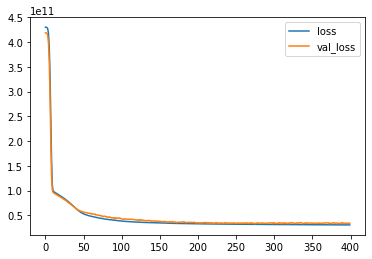

In [97]:
losses.plot()

In [98]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [99]:
predictions = model.predict(X_test)

In [100]:
mean_absolute_error(y_test,predictions)

109848.02393060378

In [101]:
np.sqrt(mean_absolute_error(y_test,predictions))

331.4332873001802

In [102]:
explained_variance_score(y_test,predictions)

0.7759772587222631

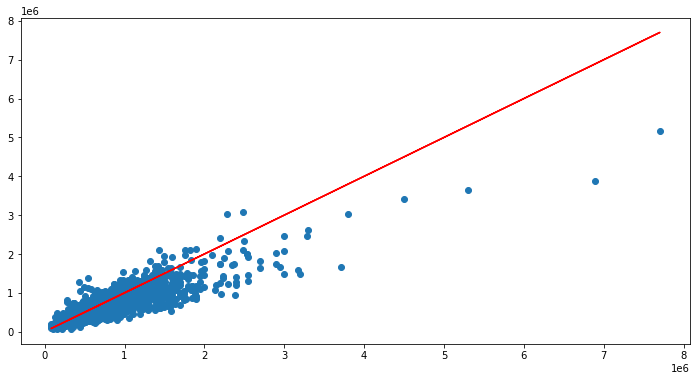

In [103]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [115]:
single_house = df.drop('price',axis=1).iloc[0]

In [117]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [118]:
model.predict(single_house)

array([[3.6140372e+09]], dtype=float32)

In [112]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64